In [1]:
#import necessary packages
import pandas as pd
import os as os

In [2]:
#check my current working directory
pwd

'/home/giovanni.macaluso'

In [3]:
#Move into our shared folder with the data files
os.chdir('/data/OA3802g1/census')

In [4]:
#list out the files in the census directory
ls

apr21pub.csv                        dec22pub.csv   mar21pub.csv
apr22pub.csv                        feb21pub.csv   mar22pub.csv
apr23pub.csv                        feb22pub.csv   mar23pub.csv
aug21pub.csv                        feb23pub.csv   may21pub.csv
aug22pub.csv                        Industry.xlsx  may22pub.csv
aug23pub.csv                        jan21pub.csv   may23pub.csv
cb_2018_us_state_5m.cpg             jan22pub.csv   nov21pub.csv
cb_2018_us_state_5m.dbf             jan23pub.csv   nov22pub.csv
cb_2018_us_state_5m.prj             jul21pub.csv   oct21pub.csv
cb_2018_us_state_5m.shp             jul22pub.csv   oct22pub.csv
cb_2018_us_state_5m.shp.ea.iso.xml  jul23pub.csv   oct23pub.csv*
cb_2018_us_state_5m.shp.iso.xml     jun21pub.csv   sep21pub.csv
cb_2018_us_state_5m.shx             jun22pub.csv   sep22pub.csv
dec21pub.csv                        jun23pub.csv   sep23pub.csv


In [5]:
#make sure we can read in one of the files correctly
df = pd.read_csv('apr21pub.csv')
df.head()

,hrhhid2,HUFINAL,OCCURNUM,HUINTTYP,HURESPLI,HUPRSCNT,HUTYPEA,HUTYPB,HUTYPC,HUBUS,...,ptnmemp1,ptnmemp2,hrhhid,gtcbsa,gtco,gtcbsast,gtcbsasz,gtcsa,gtmetsta,gtindvpc
0,11011,228,1,-1,-1,0,-1,4,-1,-1,...,-1.0,-1.0,110963190308004,19300,3,4,2,380,1,0
1,11011,201,1,2,1,0,-1,-1,-1,2,...,-1.0,-1.0,22031950003491,19300,3,4,2,380,1,0
2,11011,201,1,2,1,0,-1,-1,-1,2,...,-1.0,-1.0,67091306004561,19300,3,4,2,380,1,0
3,11011,201,1,2,1,0,-1,-1,-1,2,...,-1.0,-1.0,551764501920000,19300,3,4,2,380,1,0
4,12011,226,1,2,-1,0,-1,1,-1,-1,...,-1.0,-1.0,10006910373941,19300,3,4,2,380,1,0


In [11]:
#Name of all the files we want
files = ['apr21pub.csv',  'dec22pub.csv', 'jul21pub.csv', 'mar22pub.csv'  ,'oct21pub.csv',
'apr22pub.csv',  'feb21pub.csv',  'jul22pub.csv' ,'mar23pub.csv',  'oct22pub.csv',
'apr23pub.csv' , 'feb22pub.csv'  ,'jul23pub.csv' , 'may21pub.csv' , 'oct23pub.csv',
'aug21pub.csv' , 'feb23pub.csv' , 'jun21pub.csv' , 'may22pub.csv',  'sep21pub.csv',
'aug22pub.csv' , 'jan21pub.csv' , 'jun22pub.csv' , 'may23pub.csv', 'sep22pub.csv',
'aug23pub.csv'  ,'jan22pub.csv', 'jun23pub.csv' , 'nov21pub.csv',  'sep23pub.csv',
'dec21pub.csv', 'jan23pub.csv',  'mar21pub.csv' , 'nov22pub.csv']
files

['apr21pub.csv',
 'dec22pub.csv',
 'jul21pub.csv',
 'mar22pub.csv',
 'oct21pub.csv',
 'apr22pub.csv',
 'feb21pub.csv',
 'jul22pub.csv',
 'mar23pub.csv',
 'oct22pub.csv',
 'apr23pub.csv',
 'feb22pub.csv',
 'jul23pub.csv',
 'may21pub.csv',
 'oct23pub.csv',
 'aug21pub.csv',
 'feb23pub.csv',
 'jun21pub.csv',
 'may22pub.csv',
 'sep21pub.csv',
 'aug22pub.csv',
 'jan21pub.csv',
 'jun22pub.csv',
 'may23pub.csv',
 'sep22pub.csv',
 'aug23pub.csv',
 'jan22pub.csv',
 'jun23pub.csv',
 'nov21pub.csv',
 'sep23pub.csv',
 'dec21pub.csv',
 'jan23pub.csv',
 'mar21pub.csv',
 'nov22pub.csv']

In [12]:
#create a blank dataframe to store all of the data in
blank_df = pd.DataFrame()
#loop through all of our files to read the file in, create a blank dictionary, see if the file is from Jan23 because that is the one file with different column names
for file in files: 
    df = pd.read_csv(file)
    edu_dict= {}
    #If  it is jan 23, then it'll use the all caps column names if not it'll go to the else
    #the education levels range from 31-47 each number corresponding to a different level
    #I am only taking the values from the data where this education level(PEEDUCA) falls with the range 31-47, this gets rid of null values or bad data values with bad inputs
    #Then it goes within those values and counts the number of each level that refer to someone who is active duty(PEAFNOW==1)
    #Then it adds that education level to the dictionary as the key then it's value is the total count for that month of that level for active duty
    #Then it saved that dictionary in the data frame
    if file == 'jan23pub.csv':
        for i in list(range(31,47)):
            num = df[df['PEEDUCA']==i]
            num2 = num[num['PEAFNOW']==1].count()
            x = list(num2)
            edu_dict[i]=num2[0]
        blank_df[file] = edu_dict
    else: 
        for i in list(range(31,47)):
            num = df[df['peeduca']==i]
            num2 = num[num['peafnow']==1].count()
            x = list(num2)
            edu_dict[i]=num2[0]
        blank_df[file] = edu_dict

/tmp/ipykernel_32717/2162539542.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edu_dict[i]=num2[0]
/tmp/ipykernel_32717/2162539542.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edu_dict[i]=num2[0]
/tmp/ipykernel_32717/2162539542.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edu_dict[i]=num2[0]
/tmp/ipykernel_32717/2162539542.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

In [13]:
blank_df

,apr21pub.csv,dec22pub.csv,jul21pub.csv,mar22pub.csv,oct21pub.csv,apr22pub.csv,feb21pub.csv,jul22pub.csv,mar23pub.csv,oct22pub.csv,...,sep22pub.csv,aug23pub.csv,jan22pub.csv,jun23pub.csv,nov21pub.csv,sep23pub.csv,dec21pub.csv,jan23pub.csv,mar21pub.csv,nov22pub.csv
31,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
37,2,0,0,0,1,0,0,2,2,1,...,1,0,0,2,1,0,0,0,1,0
38,0,0,0,1,0,1,1,2,0,0,...,4,0,1,1,0,0,0,1,0,0
39,111,67,92,90,83,92,111,74,79,83,...,91,82,98,81,94,83,105,74,106,85
40,96,63,88,63,69,68,82,75,76,74,...,85,71,58,76,58,59,55,60,86,65


In [14]:
#separate out each month into it's right year list
list21 = ['apr21pub.csv', 'jul21pub.csv' ,'oct21pub.csv','feb21pub.csv', 'may21pub.csv' ,'aug21pub.csv' , 'jun21pub.csv' , 'sep21pub.csv', 
          'jan21pub.csv' , 'nov21pub.csv', 'dec21pub.csv', 'mar21pub.csv']
list22 = ['dec22pub.csv', 'mar22pub.csv', 'apr22pub.csv', 'jul22pub.csv', 'oct22pub.csv', 'feb22pub.csv', 'may22pub.csv', 'aug22pub.csv',
          'jun22pub.csv' , 'sep22pub.csv','jan22pub.csv', 'nov22pub.csv']
list23 = ['mar23pub.csv', 'apr23pub.csv','jul23pub.csv' ,'oct23pub.csv','feb23pub.csv' , 'may23pub.csv', 'aug23pub.csv'  , 'jun23pub.csv' , 
          'sep23pub.csv','jan23pub.csv']

In [18]:
#want to store the averages for each month of each level 
avg_df = pd.DataFrame()
avg21_df = pd.DataFrame()
avg22_df = pd.DataFrame()
avg23_df = pd.DataFrame()
sums = {}
#loop through each year, then average every education level for a given month file, save that average into a new dictionary, then sum up those averages to check that they equal 1
for i in list21:
    avg_dict ={}
    for j in list(range(31,47)):
        avg = (blank_df[i][j])/(blank_df[i].sum())
        avg_dict[j] = avg
    avg_df[i] = avg_dict
    avg21_df[i] = avg_dict
    sums[i]=avg_df[i].sum()
for i in list22:
    for j in list(range(31,47)):
        avg = (blank_df[i][j])/(blank_df[i].sum()) 
        avg_dict[j] = avg
    avg_df[i] = avg_dict
    avg22_df[i] = avg_dict
    sums[i]=avg_df[i].sum()
for i in list23:
    for j in list(range(31,47)):
        avg = (blank_df[i][j])/(blank_df[i].sum()) 
        avg_dict[j] = avg
    avg_df[i] = avg_dict
    avg23_df[i] = avg_dict
    sums[i]=avg_df[i].sum()
avg_df

,apr21pub.csv,jul21pub.csv,oct21pub.csv,feb21pub.csv,may21pub.csv,aug21pub.csv,jun21pub.csv,sep21pub.csv,jan21pub.csv,nov21pub.csv,...,mar23pub.csv,apr23pub.csv,jul23pub.csv,oct23pub.csv,feb23pub.csv,may23pub.csv,aug23pub.csv,jun23pub.csv,sep23pub.csv,jan23pub.csv
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.003145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37,0.004878,0.000000,0.003145,0.000000,0.005063,0.005764,0.005666,0.002865,0.000000,0.003257,...,0.006452,0.006645,0.000000,0.000000,0.003367,0.009119,0.000000,0.006452,0.000000,0.000000
38,0.000000,0.000000,0.000000,0.002342,0.000000,0.000000,0.000000,0.000000,0.002532,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003367,0.000000,0.000000,0.003226,0.000000,0.003448
39,0.270732,0.251366,0.261006,0.259953,0.243038,0.262248,0.254958,0.280802,0.250633,0.306189,...,0.254839,0.259136,0.254072,0.261128,0.242424,0.273556,0.241176,0.261290,0.244838,0.255172
40,0.234146,0.240437,0.216981,0.192037,0.217722,0.221902,0.254958,0.246418,0.212658,0.188925,...,0.245161,0.242525,0.211726,0.172107,0.235690,0.246201,0.208824,0.245161,0.174041,0.206897


In [19]:
sums

{'apr21pub.csv': 1.0,
 'jul21pub.csv': 1.0,
 'oct21pub.csv': 1.0,
 'feb21pub.csv': 1.0,
 'may21pub.csv': 1.0,
 'aug21pub.csv': 1.0,
 'jun21pub.csv': 1.0,
 'sep21pub.csv': 1.0,
 'jan21pub.csv': 1.0,
 'nov21pub.csv': 1.0,
 'dec21pub.csv': 1.0,
 'mar21pub.csv': 0.9999999999999999,
 'dec22pub.csv': 1.0,
 'mar22pub.csv': 1.0,
 'apr22pub.csv': 1.0,
 'jul22pub.csv': 1.0,
 'oct22pub.csv': 1.0,
 'feb22pub.csv': 1.0,
 'may22pub.csv': 1.0,
 'aug22pub.csv': 0.9999999999999999,
 'jun22pub.csv': 1.0,
 'sep22pub.csv': 1.0,
 'jan22pub.csv': 1.0,
 'nov22pub.csv': 1.0,
 'mar23pub.csv': 1.0,
 'apr23pub.csv': 1.0,
 'jul23pub.csv': 1.0,
 'oct23pub.csv': 1.0,
 'feb23pub.csv': 1.0,
 'may23pub.csv': 1.0,
 'aug23pub.csv': 1.0,
 'jun23pub.csv': 1.0,
 'sep23pub.csv': 1.0,
 'jan23pub.csv': 1.0}

In [20]:
#Calculate a new column mean that is the mean of every row
avg_df['mean']= avg_df.mean(axis=1)
avg_df

,apr21pub.csv,jul21pub.csv,oct21pub.csv,feb21pub.csv,may21pub.csv,aug21pub.csv,jun21pub.csv,sep21pub.csv,jan21pub.csv,nov21pub.csv,...,apr23pub.csv,jul23pub.csv,oct23pub.csv,feb23pub.csv,may23pub.csv,aug23pub.csv,jun23pub.csv,sep23pub.csv,jan23pub.csv,mean
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000278
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000092
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.003145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000462
37,0.004878,0.000000,0.003145,0.000000,0.005063,0.005764,0.005666,0.002865,0.000000,0.003257,...,0.006645,0.000000,0.000000,0.003367,0.009119,0.000000,0.006452,0.000000,0.000000,0.002496
38,0.000000,0.000000,0.000000,0.002342,0.000000,0.000000,0.000000,0.000000,0.002532,0.000000,...,0.000000,0.000000,0.000000,0.003367,0.000000,0.000000,0.003226,0.000000,0.003448,0.001771
39,0.270732,0.251366,0.261006,0.259953,0.243038,0.262248,0.254958,0.280802,0.250633,0.306189,...,0.259136,0.254072,0.261128,0.242424,0.273556,0.241176,0.261290,0.244838,0.255172,0.264777
40,0.234146,0.240437,0.216981,0.192037,0.217722,0.221902,0.254958,0.246418,0.212658,0.188925,...,0.242525,0.211726,0.172107,0.235690,0.246201,0.208824,0.245161,0.174041,0.206897,0.215766


In [21]:
avg21_df['mean']= avg21_df.mean(axis=1)
avg22_df['mean']= avg22_df.mean(axis=1)
avg23_df['mean']= avg23_df.mean(axis=1)

In [22]:
avg21_df

,apr21pub.csv,jul21pub.csv,oct21pub.csv,feb21pub.csv,may21pub.csv,aug21pub.csv,jun21pub.csv,sep21pub.csv,jan21pub.csv,nov21pub.csv,dec21pub.csv,mar21pub.csv,mean
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003135,0.000000,0.000261
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003135,0.000000,0.000261
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.003145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003257,0.003135,0.000000,0.000795
37,0.004878,0.000000,0.003145,0.000000,0.005063,0.005764,0.005666,0.002865,0.000000,0.003257,0.000000,0.002370,0.002751
38,0.000000,0.000000,0.000000,0.002342,0.000000,0.000000,0.000000,0.000000,0.002532,0.000000,0.000000,0.000000,0.000406
39,0.270732,0.251366,0.261006,0.259953,0.243038,0.262248,0.254958,0.280802,0.250633,0.306189,0.329154,0.251185,0.268439
40,0.234146,0.240437,0.216981,0.192037,0.217722,0.221902,0.254958,0.246418,0.212658,0.188925,0.172414,0.203791,0.216866


In [23]:
avg22_df

,dec22pub.csv,mar22pub.csv,apr22pub.csv,jul22pub.csv,oct22pub.csv,feb22pub.csv,may22pub.csv,aug22pub.csv,jun22pub.csv,sep22pub.csv,jan22pub.csv,nov22pub.csv,mean
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.003058,0.000000,0.000000,0.000000,0.000000,0.003247,0.000000,0.000525
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003135,0.000261
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003247,0.000000,0.000271
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.000000,0.000000,0.002941,0.000000,0.000000,0.000000,0.000000,0.000000,0.003247,0.000000,0.000516
37,0.000000,0.000000,0.000000,0.006006,0.002941,0.000000,0.000000,0.005195,0.002915,0.002778,0.000000,0.000000,0.001653
38,0.000000,0.003030,0.003115,0.006006,0.000000,0.000000,0.002882,0.012987,0.002915,0.011111,0.003247,0.000000,0.003774
39,0.223333,0.272727,0.286604,0.222222,0.244118,0.296636,0.291066,0.264935,0.294461,0.252778,0.318182,0.266458,0.269460
40,0.210000,0.190909,0.211838,0.225225,0.217647,0.186544,0.221902,0.228571,0.224490,0.236111,0.188312,0.203762,0.212109


In [24]:
avg23_df

,mar23pub.csv,apr23pub.csv,jul23pub.csv,oct23pub.csv,feb23pub.csv,may23pub.csv,aug23pub.csv,jun23pub.csv,sep23pub.csv,jan23pub.csv,mean
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37,0.006452,0.006645,0.000000,0.000000,0.003367,0.009119,0.000000,0.006452,0.000000,0.000000,0.003203
38,0.000000,0.000000,0.000000,0.000000,0.003367,0.000000,0.000000,0.003226,0.000000,0.003448,0.001004
39,0.254839,0.259136,0.254072,0.261128,0.242424,0.273556,0.241176,0.261290,0.244838,0.255172,0.254763
40,0.245161,0.242525,0.211726,0.172107,0.235690,0.246201,0.208824,0.245161,0.174041,0.206897,0.218833


In [25]:
#save the means from each year into a new data frame
yearly_means = pd.DataFrame()
yearly_means['2021']=avg21_df['mean']
yearly_means['2022']=avg22_df['mean']
yearly_means['2023']=avg23_df['mean']
yearly_means

,2021,2022,2023
31,0.000261,0.000525,0.000000
32,0.000000,0.000000,0.000000
33,0.000000,0.000261,0.000000
34,0.000261,0.000271,0.000000
35,0.000000,0.000000,0.000000
36,0.000795,0.000516,0.000000
37,0.002751,0.001653,0.003203
38,0.000406,0.003774,0.001004
39,0.268439,0.269460,0.254763
40,0.216866,0.212109,0.218833


In [26]:
#grab the level numbers that correspond from 31-38
lessHS = dict(yearly_means.iloc[0:8].sum())
lessHS

{'2021': 0.004473972469591318,
 '2022': 0.007000275101915831,
 '2023': 0.004207437416000012}

In [27]:
yearly_means.iloc[13:]

,2021,2022,2023
44,0.124322,0.116135,0.120183
45,0.013588,0.011049,0.012514
46,0.022081,0.022555,0.024908


In [28]:
#grab level numbers that correspond from 39-40
HSSC = dict(yearly_means.iloc[8:10].sum())
HSSC

{'2021': 0.48530443520653754,
 '2022': 0.48156930897420547,
 '2023': 0.4735964548023615}

In [29]:
#grab numbers 41-42
Associates = dict(yearly_means.iloc[10:12].sum())
Associates

{'2021': 0.1310987041186622,
 '2022': 0.12617877699179106,
 '2023': 0.14403066097553463}

In [30]:
#grab 43
Bachelors = dict(yearly_means.iloc[12:13].sum())
Bachelors

{'2021': 0.21913152931199265,
 '2022': 0.2355125923488214,
 '2023': 0.2205608752184113}

In [31]:
#grab the rest 
Advanced = dict(yearly_means.iloc[13:].sum())
Advanced

{'2021': 0.15999135889321647,
 '2022': 0.14973904658326623,
 '2023': 0.15760457158769253}

In [32]:
#Create a new data frame that takes the average dictionaries and adds them under the proper column name
final_avgs = pd.DataFrame()
final_avgs['Less than HS']=lessHS
final_avgs['HS Diploma with Some College'] = HSSC
final_avgs['Associates Degree'] = Associates
final_avgs['Bachelors Degree'] =Bachelors
final_avgs['Advanced'] = Advanced
final_avgs

,Less than HS,HS Diploma with Some College,Associates Degree,Bachelors Degree,Advanced
2021,0.004474,0.485304,0.131099,0.219132,0.159991
2022,0.007000,0.481569,0.126179,0.235513,0.149739
2023,0.004207,0.473596,0.144031,0.220561,0.157605


In [33]:
#this gives the overall averages for each category over the 2.5 year span
overall = {}
overall['Less than HS']=round(final_avgs['Less than HS'].mean(), 4)*100
overall['HS Diploma with Some College']=round(final_avgs['HS Diploma with Some College'].mean(), 4)*100
overall['Associates Degree'] = round(final_avgs['Associates Degree'].mean(),4)*100
overall['Bachelors Degree'] = round(final_avgs['Bachelors Degree'].mean(), 3)*100
overall['Advanced'] = round(final_avgs['Advanced'].mean(), 4)*100
overall

{'Less than HS': 0.52,
 'HS Diploma with Some College': 48.02,
 'Associates Degree': 13.38,
 'Bachelors Degree': 22.5,
 'Advanced': 15.58}

In [34]:
#same function as before but we will grabbing a different column after
blank2_df = pd.DataFrame()
for file in files: 
    #file = as_type.str(file)
    df = pd.read_csv(file)
    #edu_dict= {}
    if file == 'jan23pub.csv':
        for i in list(range(31,47)):
            num = df[df['PEEDUCA']==i]
            num2 = num[num['PEAFNOW']==1]
            #x = list(num2)
            #edu_dict[i]=num2[0]
        blank2_df = pd.concat([blank2_df,num2])
    else: 
        for i in list(range(31,47)):
            num = df[df['peeduca']==i]
            num2 = num[num['peafnow']==1]
            #x = list(num2)
            #edu_dict[i]=num2[0]
        blank2_df= pd.concat([blank2_df,num2])

In [35]:
blank2_df

,hrhhid2,HUFINAL,OCCURNUM,HUINTTYP,HURESPLI,HUPRSCNT,HUTYPEA,HUTYPB,HUTYPC,HUBUS,...,PECERT3,PXCERT1,PXCERT2,PXCERT3,PWSSWGT,PWLGWGT,PWVETWGT,PWORWGT,PWFMWGT,PWCMPWGT
1527,11011,201,2,2,1,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2309,12011,201,2,2,1,0,-1,-1,-1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3609,12011,201,1,2,1,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8882,11011,1,1,-1,4,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40107,13011,201,2,2,1,1,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26336,15011,201,2,2,1,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26345,15011,201,2,2,1,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65150,15011,201,2,2,1,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97597,15011,201,2,2,1,0,-1,-1,-1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#create the column lists that we want, then only keep those columns
col_list1 =['peeduca','peafnow','gestfips']
col_list2 = ['PEEDUCA','GESTFIPS','PEAFNOW']
col_list = ['PEEDUCA','GESTFIPS','PEAFNOW','peeduca','peafnow','gestfips']
new_df = blank2_df[col_list]
new_df

,PEEDUCA,GESTFIPS,PEAFNOW,peeduca,peafnow,gestfips
1527,NaN,NaN,NaN,46.0,1.0,13.0
2309,NaN,NaN,NaN,46.0,1.0,24.0
3609,NaN,NaN,NaN,46.0,1.0,36.0
8882,NaN,NaN,NaN,46.0,1.0,37.0
40107,NaN,NaN,NaN,46.0,1.0,48.0
...,...,...,...,...,...,...
26336,NaN,NaN,NaN,46.0,1.0,51.0
26345,NaN,NaN,NaN,46.0,1.0,51.0
65150,NaN,NaN,NaN,46.0,1.0,42.0
97597,NaN,NaN,NaN,46.0,1.0,35.0


In [37]:
#create a year 2021 dataframe that has all of the data
year21_df = pd.DataFrame()
for file in list21: 
    df = pd.read_csv(file)
    year21_df = pd.concat([year21_df, df])

In [38]:
#take the 2021 df and only keep the columns of interest then only keep the ones of value to use: active duty and valid education numbers
year21_df = year21_df[col_list1]
year21_df = year21_df[year21_df['peeduca']<=46]
year21_df = year21_df[year21_df['peeduca']>=31]
year21_df = year21_df[year21_df['peafnow']==1]
year21_df

,peeduca,peafnow,gestfips
65,39.0,1.0,1
211,39.0,1.0,1
212,43.0,1.0,1
375,40.0,1.0,9
410,39.0,1.0,10
...,...,...,...
123451,40.0,1.0,48
123636,42.0,1.0,48
124944,43.0,1.0,56
125623,41.0,1.0,38


In [39]:
#same as with 2021 but for 2022
year22_df = pd.DataFrame()
for file in list22: 
    df = pd.read_csv(file)
    year22_df = pd.concat([year22_df, df])

In [40]:
year22_df = year22_df[col_list1]
year22_df = year22_df[year22_df['peeduca']<=46]
year22_df = year22_df[year22_df['peeduca']>=31]
year22_df = year22_df[year22_df['peafnow']==1]
year22_df

,peeduca,peafnow,gestfips
173,44.0,1.0,1
949,42.0,1.0,12
1351,40.0,1.0,13
1371,43.0,1.0,13
2152,40.0,1.0,25
...,...,...,...
118062,44.0,1.0,53
120731,44.0,1.0,44
122993,43.0,1.0,12
123920,39.0,1.0,30


In [41]:
#same as 21 and 22 but for 23
year23_df = pd.DataFrame()
for file in list23: 
    df = pd.read_csv(file)
    year23_df = pd.concat([year23_df, df])

In [42]:
#save two different mini dfs with the all caps column names and lowercase column names
year23_df = year23_df[col_list]
year23CAPS_df = year23_df[col_list2]
year23lower_df = year23_df[col_list1]
year23CAPS_df

,PEEDUCA,GESTFIPS,PEAFNOW
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
125977,NaN,56.0,NaN
125978,NaN,56.0,NaN
125979,NaN,56.0,NaN
125980,NaN,56.0,NaN


In [43]:
#make the capitilized column names all lower case
year23CAPS_df.columns = map(str.lower, year23CAPS_df.columns)
year23CAPS_df

,peeduca,gestfips,peafnow
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
125977,NaN,56.0,NaN
125978,NaN,56.0,NaN
125979,NaN,56.0,NaN
125980,NaN,56.0,NaN


In [44]:
year23lower_df

,peeduca,peafnow,gestfips
0,NaN,NaN,1.0
1,39.0,2.0,1.0
2,NaN,NaN,1.0
3,39.0,2.0,1.0
4,NaN,NaN,1.0
...,...,...,...
125977,NaN,NaN,NaN
125978,NaN,NaN,NaN
125979,NaN,NaN,NaN
125980,NaN,NaN,NaN


In [45]:
#concat the two mini dfs now into 1 big df for 2023
new23_df = pd.concat([year23lower_df, year23CAPS_df])
new23_df = new23_df[new23_df['peeduca']<=46]
new23_df = new23_df[new23_df['peeduca']>=31]
new23_df = new23_df[new23_df['peafnow']==1]
new23_df

,peeduca,peafnow,gestfips
282,40.0,1.0,9.0
286,40.0,1.0,9.0
1822,43.0,1.0,24.0
3172,40.0,1.0,37.0
3301,42.0,1.0,37.0
...,...,...,...
119805,43.0,1.0,11.0
121616,44.0,1.0,44.0
121956,40.0,1.0,51.0
121990,43.0,1.0,51.0


In [46]:
#save the corresponding state to their number locator from the census survey, then create a dataframe that matches these
#key values pairs to the existing state numbers from the data
States = {1.0: 'AL', 30.0: 'MT', 2.0	:'AK'	,	31.0:	'NE',
					4.0:	'AZ',		32.0	:'NV',
					5.0	:'AR'	,	33.0:	'NH',
					6.0:	'CA',		34.0	:'NJ',
					8.0:	'CO',		35.0:	'NM',
					9.0:	'CT',		36.0:	'NY',
					10.0:	'DE',		37.0:	'NC',
					11.0:	'DC',		38.0:	'ND',
					12.0:	'FL',		39.0:	'OH',
					13.0:	'GA',		40.0:	'OK',
					15.0:	'HI',		41.0:	'OR',
					16.0:	'ID',		42.0:	'PA',
					17.0:	'IL',		44.0:	'RI',
					18.0:	'IN',		45.0:	'SC',
					19.0:	'IA',		46.0:	'SD',
					20.0:	'KS',		47.0:	'TN',
					21.0:	'KY',		48.0:	'TX',
					22.0:	'LA',		49.0:	'UT',
					23.0:	'ME',		50.0:	'VT',
					24.0:	'MD',		51.0:	'VA',
					25.0:	'MA'	,	53.0:	'WA',
					26.0:	'MI',		54.0:	'WV',
					27.0:	'MN',	55.0:	'WI',
					28.0:	'MS'	,	56.0:	'WY',
					29.0:	'MO'}
States_df = pd.DataFrame()
States_df['gestfips'] = States.keys()
States_df['STUSPS']= States.values()
States_df

,gestfips,STUSPS
0,1.0,AL
1,30.0,MT
2,2.0,AK
3,31.0,NE
4,4.0,AZ
5,32.0,NV
6,5.0,AR
7,33.0,NH
8,6.0,CA
9,34.0,NJ


In [47]:
#merge the states and 2023 dfs to now have education level, active duty, and state locations into one df
big23_df = pd.merge(new23_df, States_df, how= 'inner')
big23_df

,peeduca,peafnow,gestfips,STUSPS
0,40.0,1.0,9.0,CT
1,40.0,1.0,9.0,CT
2,39.0,1.0,9.0,CT
3,39.0,1.0,9.0,CT
4,40.0,1.0,9.0,CT
...,...,...,...,...
3155,43.0,1.0,50.0,VT
3156,43.0,1.0,50.0,VT
3157,43.0,1.0,50.0,VT
3158,43.0,1.0,50.0,VT


In [48]:
#same merge but for 2022
big22_df = pd.merge(year22_df, States_df, how= 'inner')
big22_df

,peeduca,peafnow,gestfips,STUSPS
0,44.0,1.0,1,AL
1,41.0,1.0,1,AL
2,42.0,1.0,1,AL
3,43.0,1.0,1,AL
4,44.0,1.0,1,AL
...,...,...,...,...
4008,39.0,1.0,23,ME
4009,39.0,1.0,23,ME
4010,39.0,1.0,23,ME
4011,39.0,1.0,23,ME


In [49]:
#same merge but for 2021
big21_df = pd.merge(year21_df, States_df, how = 'inner')
big21_df

,peeduca,peafnow,gestfips,STUSPS
0,39.0,1.0,1,AL
1,39.0,1.0,1,AL
2,43.0,1.0,1,AL
3,43.0,1.0,1,AL
4,42.0,1.0,1,AL
...,...,...,...,...
4403,40.0,1.0,50,VT
4404,39.0,1.0,50,VT
4405,39.0,1.0,50,VT
4406,44.0,1.0,50,VT


In [50]:
#install geopands to use for heatmaps
#!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [51]:
#import geopands, and read in the state file that'll have our geometry dimensions to draw the map of the states for each state name
import geopandas as gpd
states = gpd.read_file('cb_2018_us_state_5m.shp')
states = states[['STUSPS', 'NAME','geometry']]
states.head()

,STUSPS,NAME,geometry
0,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [52]:
#merge the 2023 df with the states data to have all the data of interest in one master df
geo_23 = big23_df.merge(states, on = 'STUSPS')
geo_23

,peeduca,peafnow,gestfips,STUSPS,NAME,geometry
0,40.0,1.0,9.0,CT,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
1,40.0,1.0,9.0,CT,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
2,39.0,1.0,9.0,CT,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
3,39.0,1.0,9.0,CT,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
4,40.0,1.0,9.0,CT,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
...,...,...,...,...,...,...
3155,43.0,1.0,50.0,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
3156,43.0,1.0,50.0,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
3157,43.0,1.0,50.0,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
3158,43.0,1.0,50.0,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."


In [53]:
#same but for 2022
geo_22 = big22_df.merge(states, on = 'STUSPS')
geo_22

,peeduca,peafnow,gestfips,STUSPS,NAME,geometry
0,44.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,41.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
2,42.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
3,43.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
4,44.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
...,...,...,...,...,...,...
4008,39.0,1.0,23,ME,Maine,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."
4009,39.0,1.0,23,ME,Maine,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."
4010,39.0,1.0,23,ME,Maine,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."
4011,39.0,1.0,23,ME,Maine,"MULTIPOLYGON (((-68.37659 44.11376, -68.37538 ..."


In [54]:
#same but for 2021
geo_21 = big21_df.merge(states, on = 'STUSPS')
geo_21

,peeduca,peafnow,gestfips,STUSPS,NAME,geometry
0,39.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,39.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
2,43.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
3,43.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
4,42.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
...,...,...,...,...,...,...
4403,40.0,1.0,50,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
4404,39.0,1.0,50,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
4405,39.0,1.0,50,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."
4406,44.0,1.0,50,VT,Vermont,"POLYGON ((-73.43774 44.04501, -73.43199 44.063..."


In [55]:
#install plotly
#!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [56]:
#install matplotlib
#!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [57]:
#import matplot
import matplotlib.pyplot as plt

In [58]:
#make this 2021 df a gpd geo df with the right geometry metrics
geo_21 = gpd.GeoDataFrame(geo_21, geometry = geo_21['geometry'])

In [59]:
#establish that we don't want hawaii and alaska included so the graph looks normal
oconus = ['AK','HI']
geo_21_conus = geo_21.query('STUSPS not in @oconus')

In [60]:
geo_21_conus.STUSPS.unique()

array(['AL', 'CT', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'NH', 'NJ', 'NY',
       'NC', 'OH', 'VA', 'DC', 'SC', 'AR', 'OK', 'WV', 'CA', 'CO', 'ID',
       'IL', 'KS', 'NV', 'SD', 'TX', 'UT', 'WY', 'MT', 'ND', 'PA', 'TN',
       'MA', 'MS', 'AZ', 'MN', 'MO', 'NE', 'NM', 'WI', 'IN', 'IA', 'WA',
       'ME', 'RI', 'MI', 'OR', 'VT'], dtype=object)

In [61]:
geo_21_conus.head()

,peeduca,peafnow,gestfips,STUSPS,NAME,geometry
0,39.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,39.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
2,43.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
3,43.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
4,42.0,1.0,1,AL,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."


In [68]:
#groupby the state and get the average peeduca value(education level), then make that new df a gpd df
geo_21_conus = geo_21_conus.groupby('STUSPS').mean('peeduca').reset_index()
geo_21_conus = pd.merge(geo_21_conus, states, how = 'inner')
geo_21_conus
geo_21_final = gpd.GeoDataFrame(geo_21_conus, geometry = geo_21_conus['geometry'])
geo_21_final

,STUSPS,peeduca,peafnow,gestfips,NAME,geometry
0,AL,41.602151,1.0,1.0,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,AR,41.289474,1.0,5.0,Arkansas,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
2,AZ,40.723404,1.0,4.0,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,CA,41.151203,1.0,6.0,California,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
4,CO,42.378947,1.0,8.0,Colorado,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
5,CT,41.043478,1.0,9.0,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
6,DC,43.489362,1.0,11.0,District of Columbia,"POLYGON ((-77.11976 38.93434, -77.10450 38.946..."
7,DE,40.617647,1.0,10.0,Delaware,"MULTIPOLYGON (((-75.57080 39.62677, -75.55945 ..."
8,FL,41.857143,1.0,12.0,Florida,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ..."
9,GA,41.669231,1.0,13.0,Georgia,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


/tmp/ipykernel_32717/3503044471.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_21_final.geometry.centroid.x, geo_21_final.geometry.centroid.y, geo_21_final['peeduca']):


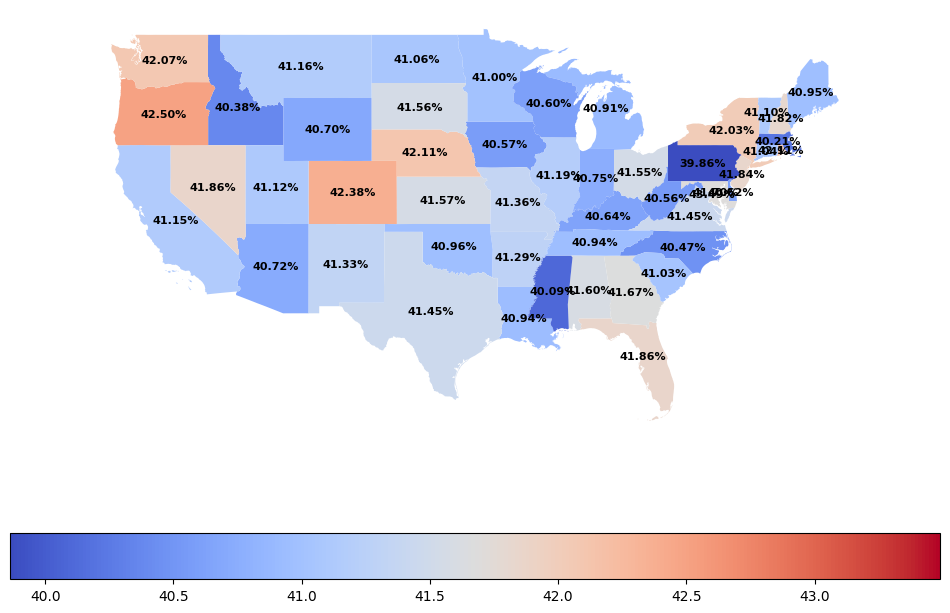

In [69]:
#2021 heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
 
# Plot the choropleth map
plot = geo_21_final.plot(column='peeduca', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)
 
# Annotate the map with percentage values
for x, y, label in zip(geo_21_final.geometry.centroid.x, geo_21_final.geometry.centroid.y, geo_21_final['peeduca']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')
 
# Turn off the axis
ax.set_axis_off()
 
# Show the plot
plt.show()

In [70]:
#same process as 2021 but for 2022
geo_22_gpd = gpd.GeoDataFrame(geo_22, geometry = geo_22['geometry'])
geo_22_conus = geo_22_gpd.query('STUSPS not in @oconus')
geo_22_conus = geo_22_conus.groupby('STUSPS').mean('peeduca').reset_index()
geo_22_conus = pd.merge(geo_22_conus, states, how = 'inner')
geo_22_final = gpd.GeoDataFrame(geo_22_conus, geometry = geo_22_conus['geometry'])
geo_22_final

,STUSPS,peeduca,peafnow,gestfips,NAME,geometry
0,AL,41.549020,1.0,1.0,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,AR,41.959184,1.0,5.0,Arkansas,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
2,AZ,41.000000,1.0,4.0,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,CA,41.050584,1.0,6.0,California,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
4,CO,42.123711,1.0,8.0,Colorado,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
5,CT,40.558140,1.0,9.0,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
6,DC,43.131148,1.0,11.0,District of Columbia,"POLYGON ((-77.11976 38.93434, -77.10450 38.946..."
7,DE,41.333333,1.0,10.0,Delaware,"MULTIPOLYGON (((-75.57080 39.62677, -75.55945 ..."
8,FL,41.456376,1.0,12.0,Florida,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ..."
9,GA,40.725000,1.0,13.0,Georgia,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


/tmp/ipykernel_32717/1566068647.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_22_final.geometry.centroid.x, geo_22_final.geometry.centroid.y, geo_22_final['peeduca']):


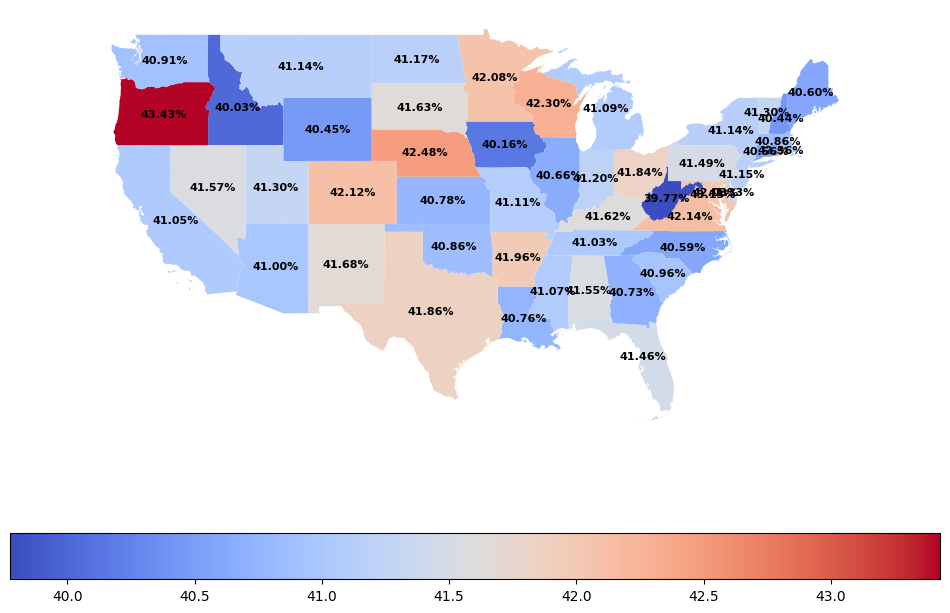

In [71]:
#2022 heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
 
# Plot the choropleth map
plot = geo_22_final.plot(column='peeduca', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)
 
# Annotate the map with percentage values
for x, y, label in zip(geo_22_final.geometry.centroid.x, geo_22_final.geometry.centroid.y, geo_22_final['peeduca']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')
 
# Turn off the axis
ax.set_axis_off()
 
# Show the plot
plt.show()

In [72]:
#2023 process is the same as 21 and 22
geo_23_gpd = gpd.GeoDataFrame(geo_23, geometry = geo_23['geometry'])
geo_23_conus = geo_23_gpd.query('STUSPS not in @oconus')
geo_23_conus = geo_23_conus.groupby('STUSPS').mean('peeduca').reset_index()
geo_23_conus = pd.merge(geo_23_conus, states, how = 'inner')
geo_23_final = gpd.GeoDataFrame(geo_23_conus, geometry = geo_23_conus['geometry'])
geo_23_final

,STUSPS,peeduca,peafnow,gestfips,NAME,geometry
0,AL,41.904762,1.0,1.0,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,AR,40.842105,1.0,5.0,Arkansas,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
2,AZ,40.750000,1.0,4.0,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,CA,40.837438,1.0,6.0,California,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
4,CO,43.270833,1.0,8.0,Colorado,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
5,CT,40.531250,1.0,9.0,Connecticut,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
6,DC,43.470588,1.0,11.0,District of Columbia,"POLYGON ((-77.11976 38.93434, -77.10450 38.946..."
7,DE,40.718750,1.0,10.0,Delaware,"MULTIPOLYGON (((-75.57080 39.62677, -75.55945 ..."
8,FL,41.333333,1.0,12.0,Florida,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ..."
9,GA,40.817391,1.0,13.0,Georgia,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


/tmp/ipykernel_32717/4255113499.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_23_final.geometry.centroid.x, geo_23_final.geometry.centroid.y, geo_23_final['peeduca']):


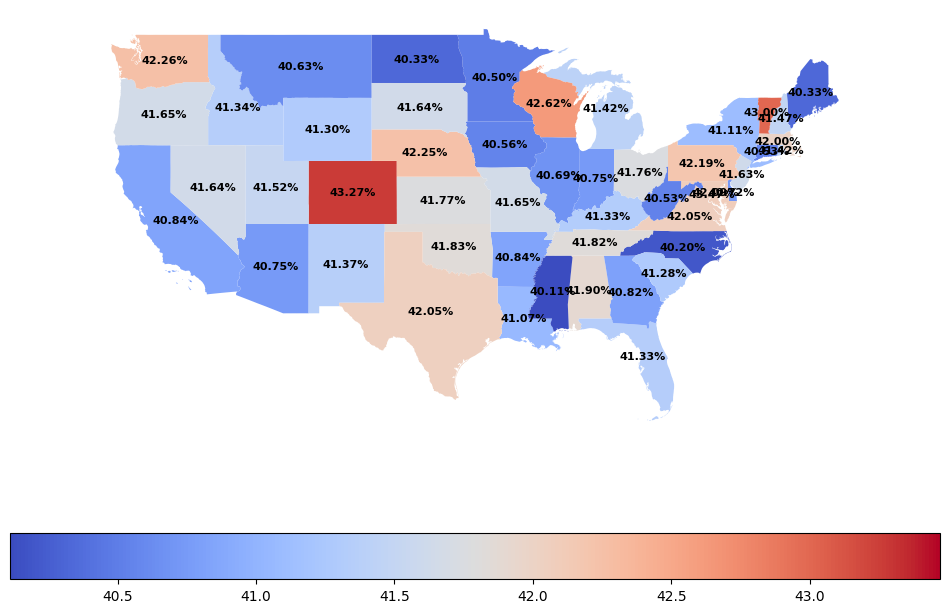

In [73]:
#2023 heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
 
# Plot the choropleth map
plot = geo_23_final.plot(column='peeduca', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)
 
# Annotate the map with percentage values
for x, y, label in zip(geo_23_final.geometry.centroid.x, geo_23_final.geometry.centroid.y, geo_23_final['peeduca']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')
 
# Turn off the axis
ax.set_axis_off()
 
# Show the plot
plt.show()